In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("../datasets/weight_height.csv", encoding="euc-kr", usecols=["학교명", "학년", "성별", "키", "몸무게"])
df

,학교명,학년,성별,키,몸무게
0,서울대도초등학교,1,남,125.8,27.3
1,서울대도초등학교,1,남,124.3,25.4
2,서울대도초등학교,1,남,119.2,23.5
3,서울대도초등학교,1,남,115.0,20.0
4,서울대도초등학교,1,남,120.0,33.5
...,...,...,...,...,...
9681,세종과학고등학교,3,남,176.1,50.4
9682,세종과학고등학교,3,남,174.1,88.8
9683,세종과학고등학교,3,남,169.5,63.2
9684,세종과학고등학교,3,여,159.2,52.9


In [3]:
# df["학교명"] -> 초등학교 = 0 / 중학교 = 6 / 고등학교 = 9 + df["학년"]
df["grade"] = df["학교명"].map(lambda x: 0 if x.endswith("초등학교")
                            else 6 if x.endswith("중학교")
                            else 9) + df["학년"]
df

,학교명,학년,성별,키,몸무게,grade
0,서울대도초등학교,1,남,125.8,27.3,1
1,서울대도초등학교,1,남,124.3,25.4,1
2,서울대도초등학교,1,남,119.2,23.5,1
3,서울대도초등학교,1,남,115.0,20.0,1
4,서울대도초등학교,1,남,120.0,33.5,1
...,...,...,...,...,...,...
9681,세종과학고등학교,3,남,176.1,50.4,12
9682,세종과학고등학교,3,남,174.1,88.8,12
9683,세종과학고등학교,3,남,169.5,63.2,12
9684,세종과학고등학교,3,여,159.2,52.9,12


In [4]:
df.drop(["학교명", "학년"], axis="columns", inplace=True)
df. columns =["gender", "height", "weight", "grade"]
df

,gender,height,weight,grade
0,남,125.8,27.3,1
1,남,124.3,25.4,1
2,남,119.2,23.5,1
3,남,115.0,20.0,1
4,남,120.0,33.5,1
...,...,...,...,...
9681,남,176.1,50.4,12
9682,남,174.1,88.8,12
9683,남,169.5,63.2,12
9684,여,159.2,52.9,12


In [5]:
# 남 : 0 / 여 : 1
df["gender"] = df["gender"].map(lambda x : 0 if x == "남" else 1)
df

,gender,height,weight,grade
0,0,125.8,27.3,1
1,0,124.3,25.4,1
2,0,119.2,23.5,1
3,0,115.0,20.0,1
4,0,120.0,33.5,1
...,...,...,...,...
9681,0,176.1,50.4,12
9682,0,174.1,88.8,12
9683,0,169.5,63.2,12
9684,1,159.2,52.9,12


In [6]:
# 데이터의 공백 또는 NoN 값을 확인
print(df.isna().sum())

gender    0
height    0
weight    4
grade     0
dtype: int64


In [7]:
# 9686개중 4개의 데이터 비정상임으로 인한 삭제 결정 및 결과 확인
df = df.dropna()
print(df.isna().sum())

gender    0
height    0
weight    0
grade     0
dtype: int64


In [8]:
# 몸무게와 키를 통해서 성별을 예측하고 싶다!! ml11 or ml12
# 1. 데이터셋 준비
x = df[["weight", "height"]]
y = df[["gender"]]

In [9]:
# 데이터 이상유무 재 확인
print(x.isna().sum())
print(x.isnull().sum())
print(x.shape, y.shape)


weight    0
height    0
dtype: int64
weight    0
height    0
dtype: int64
(9682, 2) (9682, 1)


In [10]:
# 2. 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [11]:
# 3. 모델 선택
model = LogisticRegression()

In [12]:
# 4. 모델 학습
model.fit(x_train, y_train)

/Users/handaeseong/dev/data-engineer/miniconda3/envs/multi02/lib/python3.14/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [13]:
# 5. 예측 및 평가
model.score(x_test, y_test)

0.5290877796901893

In [14]:
model.predict([[125.8, 27.3],[124.3, 25.4],[119.2, 23.5],[115.0, 20.0],[120.0, 33.5], [174.1, 88.8]])

/Users/handaeseong/dev/data-engineer/miniconda3/envs/multi02/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1, 1, 1, 1, 1, 0])

In [15]:
# 평가지표를 가져가다가 평가해 보세요! ml14 참고
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score, classification_report, precision_recall_curve, roc_curve, roc_auc_score

In [16]:
predict = model.predict(x_test)
cm = confusion_matrix(y_test, predict)
cm

array([[957, 553],
       [815, 580]])

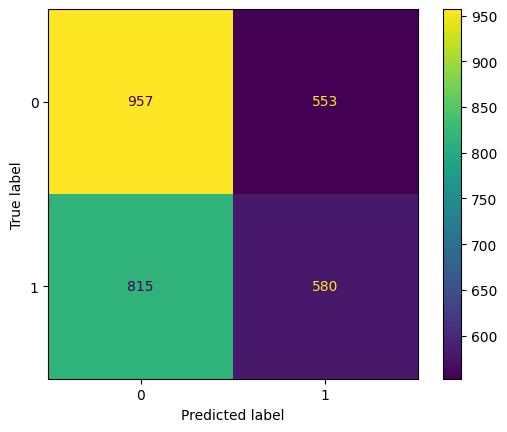

In [17]:
ConfusionMatrixDisplay(cm).plot()

In [ ]:
precision = precision_score(y_test, predict, average=None)

for 